In [4]:
import torch
import matplotlib.pyplot as plt

from transformers.optimization import AdamW
%matplotlib inline

/data/hzz5361/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


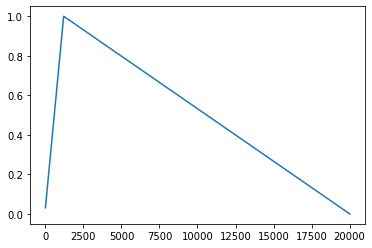

In [10]:
model = torch.nn.Linear(2, 1)
optimizer = AdamW(model.parameters(), lr=1e-5, betas = (0.9,0.98),   weight_decay = 0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-5, div_factor=32, steps_per_epoch=5004, epochs=4, pct_start=0.06, anneal_strategy='linear')
lrs = []


for i in range(4*5004):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"] * 100000)
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)